# Nataf transformation

Author: Dimitris G. Giovanis,
Date: June 25, 2018

Description: Transform independent and/or dependent standard normal random variables to the basic random variables space given their marginal distributions. 

In [1]:
from UQpy.SampleMethods import MCS, Nataf
import numpy as np
import matplotlib.pyplot as plt

Case 1: Independent standard normal variables

In [2]:
x = MCS(dimension=2, dist_name=['Normal', 'Normal'], dist_params=[[0, 1], [0, 1]], nsamples=1000)
# Define the aussian correlation matrix of the random variables
Rho_G = np.array([[1.0, 0.9], [0.9, 1.0]])
print('Correlation matrix in the standard normal space')
print(Rho_G)

UQpy: Performing MCS design...
Done!
Correlation matrix in the standard normal space
[[ 1.   0.9]
 [ 0.9  1. ]]


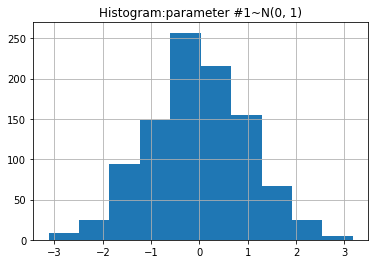

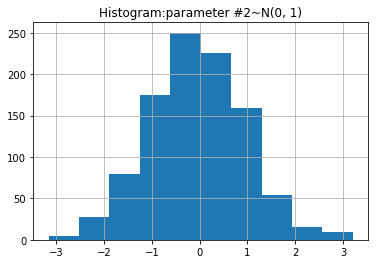

In [3]:
# Plot the distribution of the variables in the standard normal space
fig, ax = plt.subplots()
plt.title('Histogram:parameter #1~N(0, 1)')
plt.hist(x.samples[:, 0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig, ax = plt.subplots()
plt.title('Histogram:parameter #2~N(0, 1)')
plt.hist(x.samples[:, 1])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

Caution: The samples provided must be realizations of standard normal random variables.
Correlating standard normal samples...


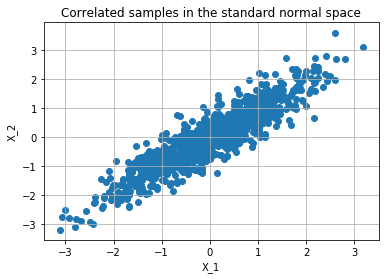

In [15]:
z = Nataf(samples=x, corr_norm=Rho_G, marginal_name=['Uniform', 'Uniform'], marginal_params=[[1, 3], [0, 1]])

plt.figure()
plt.title('Correlated samples in the standard normal space')
plt.scatter(z.samples_corr[:, 0], z.samples_corr[:, 1])
plt.grid(True)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

Correlation matrix in the original space
[[ 1.          0.87906049]
 [ 0.87906049  1.        ]]


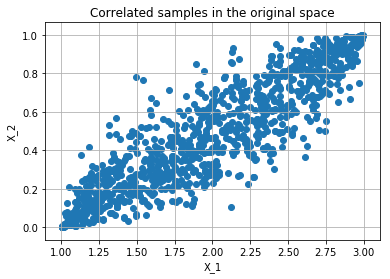

In [6]:
print('Correlation matrix in the original space')
print(z.corr)

plt.figure()
plt.title('Correlated samples in the original space')
plt.scatter(z.samples_x[:, 0], z.samples_x[:, 1])
plt.grid(True)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

In [9]:
from UQpy.SampleMethods import Correlate

# Given samples as an array
y = Correlate(x, corr_norm=Rho_G)

Correlating standard normal samples...


In [10]:
z0 = Nataf(samples=y, marginal_name=['Uniform', 'Uniform'], marginal_params=[[1, 3], [0, 1]])

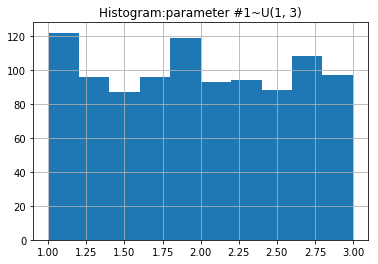

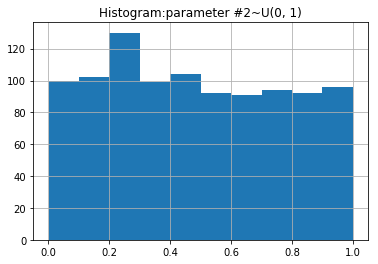

In [14]:
# Plot the distribution of the variables in the basic space
fig, ax = plt.subplots()
plt.title('Histogram:parameter #1~U(1, 3)')
plt.hist(z0.samples_x[:, 0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig, ax = plt.subplots()
plt.title('Histogram:parameter #2~U(0, 1)')
plt.hist(z0.samples_x[:, 1])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()